In [5]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

# Convert date column to datetime format
df['dt'] = pd.to_datetime(df['dt'])

# Drop missing values in temperature
df.dropna(subset=['AverageTemperature'], inplace=True)

# Sort by date
df = df.sort_values(by='dt')

# Display dataset overview
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 228175 entries, 128607 to 155195
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             228175 non-null  datetime64[ns]
 1   AverageTemperature             228175 non-null  float64       
 2   AverageTemperatureUncertainty  228175 non-null  float64       
 3   City                           228175 non-null  object        
 4   Country                        228175 non-null  object        
 5   Latitude                       228175 non-null  object        
 6   Longitude                      228175 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 13.9+ MB
None
               dt  AverageTemperature  AverageTemperatureUncertainty  \
128607 1743-11-01               7.541                          1.753   
114923 1743-11-01               0.895                    

In [6]:
# Grouping by date to calculate average global temperature
global_temp = df.groupby('dt')['AverageTemperature'].mean().reset_index()

# Display first few rows
print(global_temp.head())


          dt  AverageTemperature
0 1743-11-01            4.020077
1 1744-04-01            8.796923
2 1744-05-01           12.195385
3 1744-06-01           17.080385
4 1744-07-01           19.283308


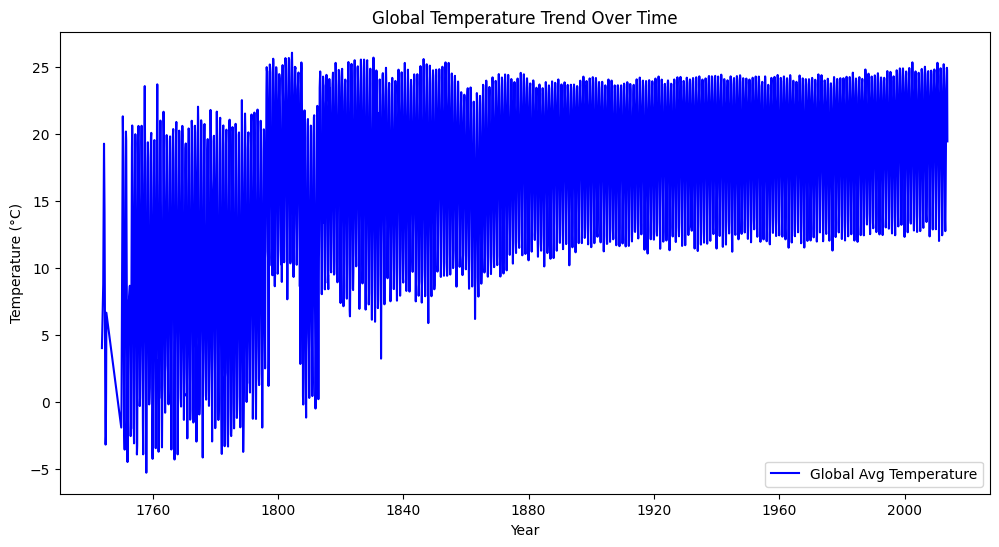

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(global_temp['dt'], global_temp['AverageTemperature'], label="Global Avg Temperature", color='blue')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Global Temperature Trend Over Time")
plt.legend()
plt.show()


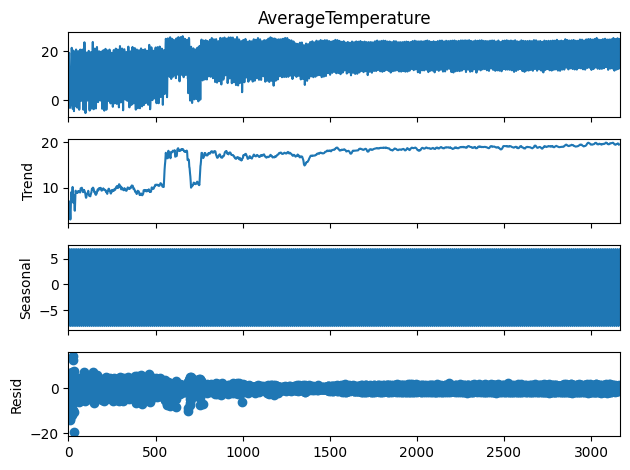

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing time series
result = seasonal_decompose(global_temp['AverageTemperature'], model='additive', period=12)
result.plot()
plt.show()


ADF Statistic: -2.4240733078081154, p-value: 0.13505684496255232


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13360\2881782199.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(global_temp['dt'].max(), periods=60, freq='M'), forecast, label="Forecast", color='red')


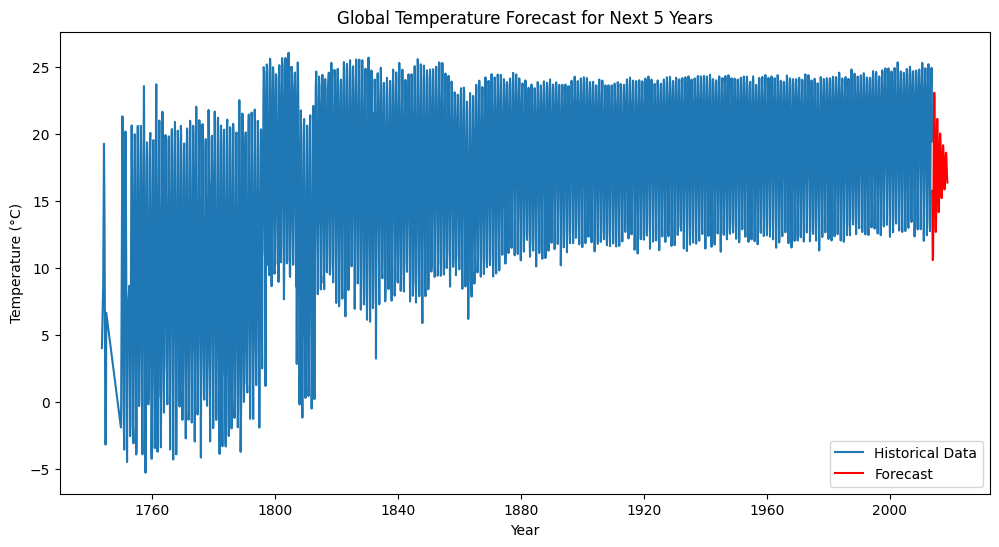

In [9]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Check stationarity
adf_test = adfuller(global_temp['AverageTemperature'])
print(f'ADF Statistic: {adf_test[0]}, p-value: {adf_test[1]}')

# Fit ARIMA model (Auto ARIMA selection recommended for tuning)
model = ARIMA(global_temp['AverageTemperature'], order=(5,1,0))
model_fit = model.fit()

# Forecast next 5 years (60 months)
forecast = model_fit.forecast(steps=60)

# Plot Forecast
plt.figure(figsize=(12,6))
plt.plot(global_temp['dt'], global_temp['AverageTemperature'], label="Historical Data")
plt.plot(pd.date_range(global_temp['dt'].max(), periods=60, freq='M'), forecast, label="Forecast", color='red')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Global Temperature Forecast for Next 5 Years")
plt.legend()
plt.show()


Epoch 1/50


C:\Users\jeeva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


198/198 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.1699
Epoch 2/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0080
Epoch 3/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0055
Epoch 4/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0043
Epoch 5/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0037
Epoch 6/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0031
Epoch 7/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0029
Epoch 8/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0028
Epoch 9/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0025
Epoch 10/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0022
Epoch 11/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0020
Epoch 12/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0015
Epoch 13/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0020
Epoch 14/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0018
Epoch 15/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step

C:\Users\jeeva\AppData\Local\Temp\ipykernel_13360\1987194833.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(global_temp['dt'].max(), periods=60, freq='M'), predictions, label="LSTM Forecast", color='green')


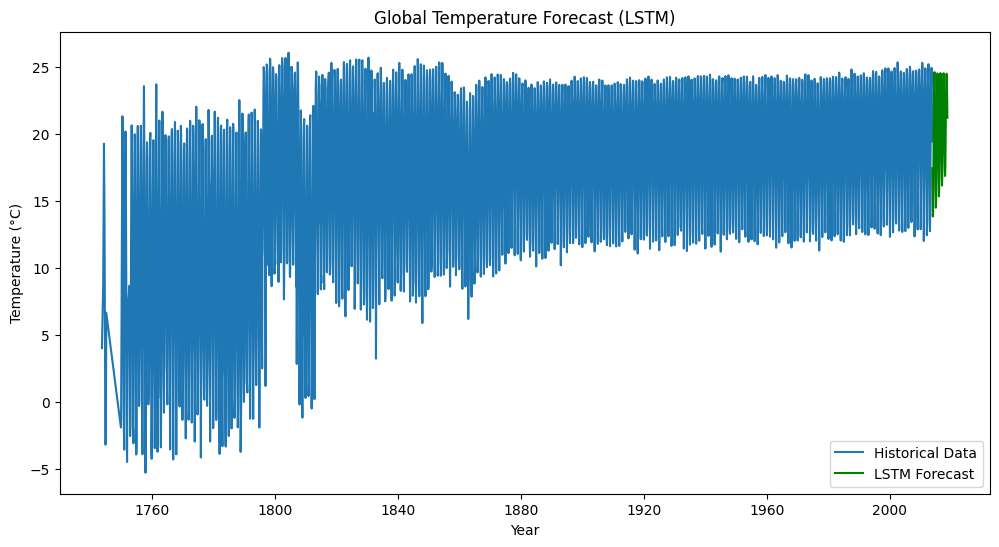

In [16]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize Data
scaler = MinMaxScaler()
global_temp['scaled_temp'] = scaler.fit_transform(global_temp['AverageTemperature'].values.reshape(-1,1))

# Prepare Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # 1 year window
X, y = create_sequences(global_temp['scaled_temp'].values, seq_length)

# Reshape input for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train Model
model.fit(X, y, epochs=50, batch_size=16)

# Predict Future Values
future_inputs = global_temp['scaled_temp'].values[-seq_length:].reshape(1, seq_length, 1)
predictions = []

for _ in range(60):  # Forecast next 60 months
    pred = model.predict(future_inputs)[0]
    predictions.append(pred)
    future_inputs = np.append(future_inputs[:, 1:, :], [[pred]], axis=1)

# Rescale Predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot Forecast
plt.figure(figsize=(12,6))
plt.plot(global_temp['dt'], global_temp['AverageTemperature'], label="Historical Data")
plt.plot(pd.date_range(global_temp['dt'].max(), periods=60, freq='M'), predictions, label="LSTM Forecast", color='green')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Global Temperature Forecast (LSTM)")
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual vs. Predicted Values
y_test = global_temp['AverageTemperature'].iloc[-60:]
y_pred_arima = forecast  # ARIMA forecasted values

# Evaluate ARIMA
mae_arima = mean_absolute_error(y_test, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))
r2_arima = r2_score(y_test, y_pred_arima)

print(f"🔹 ARIMA Model Performance:")
print(f"MAE: {mae_arima:.2f}°C")
print(f"RMSE: {rmse_arima:.2f}°C")
print(f"R² Score: {r2_arima:.2f}")

# Evaluate LSTM
y_pred_lstm = predictions.flatten()
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"\n🔹 LSTM Model Performance:")
print(f"MAE: {mae_lstm:.2f}°C")
print(f"RMSE: {rmse_lstm:.2f}°C")
print(f"R² Score: {r2_lstm:.2f}")


🔹 ARIMA Model Performance:
MAE: 3.68°C
RMSE: 4.32°C
R² Score: 0.01

🔹 LSTM Model Performance:
MAE: 1.67°C
RMSE: 2.10°C
R² Score: 0.77


In [18]:
# Save the trained model
model.save("lstm_temperature_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Define custom objects
custom_objects = {"mse": MeanSquaredError()}

# Load model with custom loss function
model = load_model("lstm_temperature_model.h5", custom_objects=custom_objects)


In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

# Filter Indian cities
india_cities = df[df['Country'] == 'India']['City'].unique()

# Display the cities
print("Cities in India from dataset:")
print(india_cities)


Cities in India from dataset:
['Ahmadabad' 'Bangalore' 'Bombay' 'Calcutta' 'Delhi' 'Hyderabad' 'Jaipur'
 'Kanpur' 'Lakhnau' 'Madras' 'Nagpur' 'New Delhi' 'Pune' 'Surat']


In [30]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from prettytable import PrettyTable

# Suppress TensorFlow messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Load trained LSTM model
model = load_model("lstm_temperature_model.h5", compile=False)

# Load dataset
df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

# Convert 'dt' to datetime format and sort
df['dt'] = pd.to_datetime(df['dt'])
df = df.sort_values(by="dt")

# List of popular Indian cities in the dataset
popular_cities = df[df["Country"] == "India"]["City"].unique()

tf.config.run_functions_eagerly(True)



def predict_temperature(city_name, months=12):    
    months = min(max(1, months), 12)  # Ensure valid range (1-12 months)

    # Filter data for the selected city
    city_df = df[(df['City'].str.lower() == city_name.lower())]

    if city_df.empty:
        print(f"\n❌ No data available for {city_name} in India. Please try another city.")
        return

    # Select relevant columns and drop NaNs
    city_df = city_df[['dt', 'AverageTemperature']].dropna()

    # Normalize temperature values for LSTM
    scaler = MinMaxScaler()
    city_df['Scaled_Temp'] = scaler.fit_transform(city_df['AverageTemperature'].values.reshape(-1, 1))

    # Define sequence length
    seq_length = 12  # 1-year window

    # Extract last sequence
    last_sequence = city_df['Scaled_Temp'].values[-seq_length:].reshape(1, seq_length, 1)

    # Predict future temperatures
    future_predictions = []
    for _ in range(months):
        pred = model.predict(last_sequence, verbose=0)[0, 0]  # Suppress output
        future_predictions.append(pred)
        last_sequence = np.append(last_sequence[:, 1:, :], [[[pred]]], axis=1)  # Update sequence

    # Convert predictions back to original scale
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Ensure predictions start from the next available month in 2025
    today = pd.Timestamp("2025-03-01")  # Start from March 2025
    future_dates = pd.date_range(today, periods=months, freq='ME')

    # Create table with temperature range
    table = PrettyTable()
    table.field_names = ["Month", "Expected Temperature (°C)"]
    
    for date, temp in zip(future_dates, future_predictions.flatten()):
        min_temp = round(temp - 1.5, 2)
        max_temp = round(temp + 1.5, 2)
        table.add_row([date.strftime("%B %Y"), f"{min_temp}°C - {max_temp}°C"])

    print(f"\n📌 Predicted Temperature Range for {city_name} (Next {months} Months)")
    print(table)


# Interactive User Input
city_input = input("\n🔍 Enter the city name: ").strip()
months_input = input("📆 Enter number of months to predict (1-12): ").strip()

# Convert months to integer (default to 12 if invalid)
try:
    months_input = int(months_input)
except ValueError:
    months_input = 12

# Call the function
predict_temperature(city_input, months_input)



🔍 Enter the city name:  Madras
📆 Enter number of months to predict (1-12):  12


C:\Users\jeeva\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



📌 Predicted Temperature Range for Madras (Next 12 Months)
+----------------+---------------------------+
|     Month      | Expected Temperature (°C) |
+----------------+---------------------------+
|   March 2025   |     28.07°C - 31.07°C     |
|   April 2025   |     26.89°C - 29.89°C     |
|    May 2025    |     25.95°C - 28.95°C     |
|   June 2025    |     25.59°C - 28.59°C     |
|   July 2025    |     26.21°C - 29.21°C     |
|  August 2025   |     27.64°C - 30.64°C     |
| September 2025 |     29.45°C - 32.45°C     |
|  October 2025  |     31.04°C - 34.04°C     |
| November 2025  |     31.95°C - 34.95°C     |
| December 2025  |      31.8°C - 34.8°C      |
|  January 2026  |     30.96°C - 33.96°C     |
| February 2026  |     29.83°C - 32.83°C     |
+----------------+---------------------------+
